In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import cameo
from cobra.manipulation import find_gene_knockout_reactions
from bokeh.plotting import show, figure, output_notebook

In [3]:
output_notebook()

Loading BokehJS ...

In [4]:
%matplotlib inline

In [5]:
model = cameo.load_model("iMM904")

In [16]:
False and 90

False

In [25]:
def convert_gene_to_reactions(gene):
    if gene in model.genes:
        return set(r.id for r in find_gene_knockout_reactions(model, [gene]))
    else:
        return set()
    
def find_affected_reactions(gene):
    if gene in model.genes:
        return set(r.id for r in model.genes.get_by_id(gene).reactions)
    else:
        return set()

df = pd.read_csv("../Data/Mulleder_et_al_data.tsv", sep="\t").iloc[:, :-1]
aa_list = df.columns[2:]
df["reactions"] = df["ORF"].map(convert_gene_to_reactions)
df["affected_reactions"] = df["ORF"].map(find_affected_reactions)
df["metabolic"] = df["ORF"].map(lambda x: x in model.genes and bool(model.genes.get_by_id(x).reactions))
num_df = df[aa_list]
df.to_csv("../Data/Processed_mulleder_data.tsv", sep="\t")

In [24]:
model.genes[0].reactions

frozenset({<Reaction 13BGH at 0x120d59198>})

In [11]:
len(set(g.id for g in model.genes) - set(df["ORF"]))

287

In [7]:
pca = PCA(n_components=2)

In [8]:
pca.fit(num_df)

PCA(copy=True, n_components=2, whiten=False)

In [24]:
pca_coords = pca.transform(log_df[aa_list])

In [25]:
pca_coords.shape

(4678, 2)

In [26]:
pca_coords[0]

array([ 33.38237553,  -5.47802729])

In [27]:
fig = figure()
#fig.text([1, 2, 3], [5, 6, 7], list("hej"))
fig.text(pca_coords[:, 0], pca_coords[:, 1], df["gene"].map(str))
show(fig)

/Users/krisj/anaconda/envs/cfb/lib/python3.4/site-packages/seaborn/categorical.py:2296: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


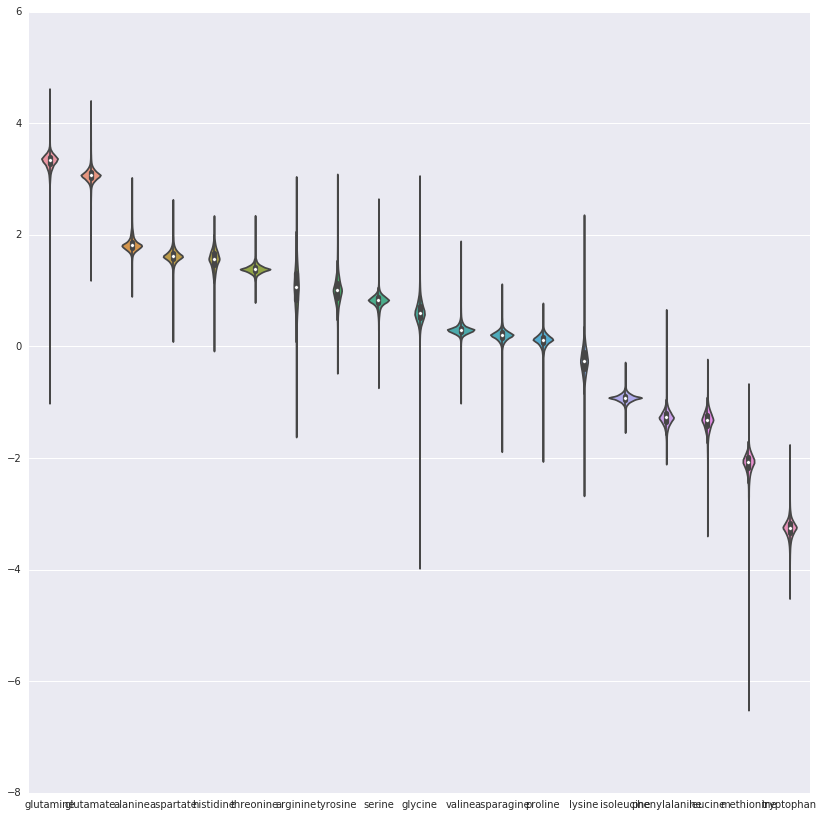

In [63]:
plt.figure(figsize=[14, 14])
sbn.violinplot(np.log(num_df[num_df.mean().sort_values(ascending=False).index]))

In [13]:
fc_df = df.copy()
fc_df[aa_list] = df[aa_list] / df[aa_list].median()

In [14]:
log_df = fc_df.copy()
log_df[aa_list] = np.log(fc_df[aa_list])

In [15]:
abs_log_df = log_df.copy()
abs_log_df[aa_list] = log_df[aa_list].abs()

In [130]:
abs_log_df.groupby("metabolic").median()

,alanine,aspartate,glutamate,phenylalanine,glycine,histidine,isoleucine,lysine,leucine,methionine,asparagine,proline,glutamine,arginine,serine,threonine,valine,tryptophan,tyrosine
metabolic,,,,,,,,,,,,,,,,,,,
False,0.056337,0.056458,0.058492,0.078851,0.109012,0.108508,0.038433,0.149375,0.099022,0.089831,0.047755,0.057052,0.067879,0.244448,0.054942,0.039521,0.038711,0.082440,0.132622
True,0.052932,0.055384,0.052069,0.072528,0.109153,0.109116,0.036176,0.143628,0.097189,0.094779,0.049694,0.049563,0.060477,0.250661,0.051786,0.042931,0.038683,0.085801,0.129438


(0, 10)

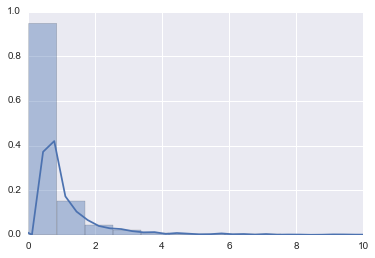

In [32]:
sbn.distplot((log_df[aa_list]**2).sum(1))
plt.xlim(0, 10)

In [85]:
list(model.genes)[0].

frozenset({<Reaction 13BGH at 0x1279979e8>})

In [91]:
list(model.reactions)[2].gene_reaction_rule

'((YCR034W and YGR032W) and YLR343W) or ((YCR034W and YGR032W) and YMR215W) or ((YCR034W and YMR306W) and YMR215W) or ((YCR034W and YLR342W) and YOL132W) or ((YCR034W and YMR306W) and YOL132W) or ((YCR034W and YGR032W) and YOL030W) or ((YCR034W and YLR342W) and YOL030W) or ((YCR034W and YMR306W) and YOL030W) or ((YCR034W and YLR342W) and YLR343W) or ((YCR034W and YMR306W) and YLR343W) or ((YCR034W and YGR032W) and YOL132W) or ((YCR034W and YLR342W) and YMR215W) or ((YCR034W and YGR032W) and YMR307W) or ((YCR034W and YLR342W) and YMR307W) or ((YCR034W and YMR306W) and YMR307W)'

In [138]:
log_df[aa_list].corr()["alanine"].argmax()

'alanine'

In [29]:
df.sort_values("ORF")

,ORF,gene,alanine,aspartate,glutamate,phenylalanine,glycine,histidine,isoleucine,lysine,...,glutamine,arginine,serine,threonine,valine,tryptophan,tyrosine,reactions,affected_reactions,metabolic
0,YAL002W,VPS8,7.575695,6.023942,29.799218,0.172805,1.668835,5.518672,0.346954,1.017763,...,38.743733,5.000892,2.227969,3.830483,1.354447,0.022283,1.064131,{},{},False
1,YAL004W,NaN,5.885958,5.035586,23.627768,0.280726,1.793227,3.916185,0.407873,0.662228,...,27.583021,2.375404,2.284112,3.952990,1.323046,0.040681,3.180600,{},{},False
2,YAL005C,SSA1,5.903218,4.826971,23.024489,0.300006,1.846948,4.764524,0.410972,0.707888,...,22.608953,2.697176,2.152940,3.711750,1.367357,0.043073,2.724967,{},{},False
3,YAL007C,ERP2,5.882356,5.405774,20.391227,0.258860,1.884296,5.554489,0.357562,0.946165,...,28.793732,2.875816,2.414602,3.967596,1.231819,0.038839,2.659337,{},{},False
4,YAL008W,FUN14,5.838249,4.682146,19.302517,0.286509,2.366559,7.124882,0.424865,1.244891,...,26.754974,4.704578,2.784608,3.851613,1.204111,0.055207,1.465688,{},{},False
5,YAL009W,SPO7,6.127094,4.964403,20.357183,0.273921,2.052587,6.555071,0.390481,1.025218,...,30.353723,4.267131,2.742248,3.647037,1.283748,0.046181,1.850170,{},{},False
6,YAL010C,MDM10,16.635074,9.339424,14.273618,0.404866,2.653583,6.004222,0.347861,0.764978,...,16.449023,5.471303,1.411822,3.843292,0.870048,0.091546,14.634799,{},{},False
7,YAL011W,SWC3,5.941725,4.928635,21.471860,0.292879,1.872352,5.386901,0.420009,0.843205,...,24.664537,3.870374,2.016907,3.996454,1.481348,0.036864,2.111769,{},{},False
8,YAL013W,DEP1,5.942905,5.153243,23.670757,0.308679,1.828181,3.245301,0.387462,0.931528,...,23.032602,2.454622,1.997341,3.597418,1.157078,0.042331,4.176379,{},{},False
9,YAL014C,SYN8,5.987866,4.599208,18.859910,0.296529,2.552670,5.317077,0.380496,0.740984,...,24.868899,3.769624,2.386637,3.996454,1.404212,0.042725,2.746576,{},{},False


In [52]:
p_vals = pd.read_csv("../Data/Mulleder_et_al_data_Z_pvals.txt", sep="\t")
p_vals.index = p_vals.ORF
del p_vals["gene"]
del p_vals["ORF"]
p_vals.to_csv("../Data/Cleaned_p_vals.tsv", sep="\t")

In [41]:
p_vals

,alanine,aspartate,glutamate,phenylalanine,glycine,histidine,isoleucine,lysine,leucine,methionine,asparagine,proline,glutamine,arginine,serine,threonine,valine,tryptophan,tyrosine
ORF,,,,,,,,,,,,,,,,,,,
YAL002W,7.822726e-03,1.621466e-01,1.017380e-04,0.061670,0.998740,0.892098,0.396173,0.707872,0.073714,0.859909,0.920789,4.724730e-04,0.006443,0.435373,0.960843,0.988957,9.743338e-01,4.070805e-02,2.298940e-02
YAL004W,9.703136e-01,9.989343e-01,7.952639e-01,0.999251,0.998740,0.750902,0.992824,0.973921,0.998149,0.968082,0.351940,9.828532e-01,0.992666,0.957132,0.971768,0.998376,9.743338e-01,9.983658e-01,8.602459e-01
YAL005C,9.703136e-01,9.989343e-01,9.184192e-01,0.999251,0.998740,0.990744,0.992824,0.998017,0.947079,0.985793,0.772365,9.869978e-01,0.301794,0.996683,0.859924,0.819128,9.743338e-01,9.983658e-01,9.928972e-01
YAL007C,9.703136e-01,9.063225e-01,9.544329e-01,0.999251,0.998740,0.884455,0.632494,0.881307,0.991102,0.348915,0.933417,9.828532e-01,0.992666,0.996683,0.958684,0.998376,6.482485e-01,9.983658e-01,9.963113e-01
YAL008W,9.703136e-01,9.166102e-01,7.240891e-01,0.999251,0.753256,0.074978,0.845529,0.075284,0.609739,0.767847,0.998094,9.828532e-01,0.977739,0.609723,0.062661,0.998376,4.255876e-01,5.288139e-02,1.773928e-01
YAL009W,9.703136e-01,9.989343e-01,9.500148e-01,0.999251,0.998740,0.286543,0.992824,0.681914,0.931178,0.985793,0.998094,9.954670e-01,0.965324,0.825745,0.109873,0.676558,9.743338e-01,7.795816e-01,5.424876e-01
YAL010C,1.422800e-120,3.518130e-23,8.870580e-04,0.011176,0.187294,0.620211,0.414636,0.998017,0.506547,0.009936,0.008324,3.007675e-02,0.000469,0.189882,0.000007,0.998376,2.080860e-08,4.986340e-23,4.046100e-127
YAL011W,9.703136e-01,9.989343e-01,9.970760e-01,0.999251,0.998740,0.957705,0.922153,0.993494,0.991102,0.985793,0.998094,5.000237e-01,0.679099,0.929482,0.427383,0.998376,3.883887e-01,9.983658e-01,8.147524e-01
YAL013W,9.703136e-01,9.989343e-01,7.901065e-01,0.982142,0.998740,0.329738,0.992824,0.900829,0.835889,0.309217,0.998094,9.333770e-01,0.368980,0.974753,0.368492,0.548663,1.481318e-01,9.983658e-01,4.354120e-02


In [49]:
(p_vals < 0.05).values.any(1).sum() / len(p_vals)

0.31402308678922619

In [50]:
len(p_vals.columns)

19

In [51]:
df

,ORF,gene,alanine,aspartate,glutamate,phenylalanine,glycine,histidine,isoleucine,lysine,...,glutamine,arginine,serine,threonine,valine,tryptophan,tyrosine,reactions,affected_reactions,metabolic
0,YAL002W,VPS8,7.575695,6.023942,29.799218,0.172805,1.668835,5.518672,0.346954,1.017763,...,38.743733,5.000892,2.227969,3.830483,1.354447,0.022283,1.064131,{},{},False
1,YAL004W,NaN,5.885958,5.035586,23.627768,0.280726,1.793227,3.916185,0.407873,0.662228,...,27.583021,2.375404,2.284112,3.952990,1.323046,0.040681,3.180600,{},{},False
2,YAL005C,SSA1,5.903218,4.826971,23.024489,0.300006,1.846948,4.764524,0.410972,0.707888,...,22.608953,2.697176,2.152940,3.711750,1.367357,0.043073,2.724967,{},{},False
3,YAL007C,ERP2,5.882356,5.405774,20.391227,0.258860,1.884296,5.554489,0.357562,0.946165,...,28.793732,2.875816,2.414602,3.967596,1.231819,0.038839,2.659337,{},{},False
4,YAL008W,FUN14,5.838249,4.682146,19.302517,0.286509,2.366559,7.124882,0.424865,1.244891,...,26.754974,4.704578,2.784608,3.851613,1.204111,0.055207,1.465688,{},{},False
5,YAL009W,SPO7,6.127094,4.964403,20.357183,0.273921,2.052587,6.555071,0.390481,1.025218,...,30.353723,4.267131,2.742248,3.647037,1.283748,0.046181,1.850170,{},{},False
6,YAL010C,MDM10,16.635074,9.339424,14.273618,0.404866,2.653583,6.004222,0.347861,0.764978,...,16.449023,5.471303,1.411822,3.843292,0.870048,0.091546,14.634799,{},{},False
7,YAL011W,SWC3,5.941725,4.928635,21.471860,0.292879,1.872352,5.386901,0.420009,0.843205,...,24.664537,3.870374,2.016907,3.996454,1.481348,0.036864,2.111769,{},{},False
8,YAL013W,DEP1,5.942905,5.153243,23.670757,0.308679,1.828181,3.245301,0.387462,0.931528,...,23.032602,2.454622,1.997341,3.597418,1.157078,0.042331,4.176379,{},{},False
9,YAL014C,SYN8,5.987866,4.599208,18.859910,0.296529,2.552670,5.317077,0.380496,0.740984,...,24.868899,3.769624,2.386637,3.996454,1.404212,0.042725,2.746576,{},{},False
